In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
df = pd.read_csv('./1년 1시간별 Ls, Ws.csv', encoding = 'cp949')
df

,자치구,대여소명,대여소번호,년,월,시간,lambda,mu,c,rho,p_0,p_1,p_1+,p_c,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,1442,2020,6,0,3.800000,2.700000,6.0,1.407407,0.040995,0.057696,0.959005,0.318602,4.249820,1.641292
1,중랑구,(구)신한은행 중랑교지점,1442,2020,6,1,3.700000,2.133333,6.0,1.734375,0.015893,0.027565,0.984107,0.432587,4.789792,2.281475
2,중랑구,(구)신한은행 중랑교지점,1442,2020,6,2,2.133333,1.266667,6.0,1.684211,0.018275,0.030779,0.981725,0.417101,4.725431,3.800050
3,중랑구,(구)신한은행 중랑교지점,1442,2020,6,3,1.566667,0.833333,6.0,1.880000,0.010731,0.020174,0.989269,0.473793,4.948997,6.003217
4,중랑구,(구)신한은행 중랑교지점,1442,2020,6,4,1.333333,0.533333,6.0,2.500000,0.002462,0.006154,0.997538,0.600985,5.344821,10.046270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694939,강서구,힐스테이트에코,2720,2021,5,19,7.933333,8.066667,9.0,0.983471,0.107665,0.105886,0.892335,0.092668,4.362561,0.606066
694940,강서구,힐스테이트에코,2720,2021,5,20,5.166667,7.800000,9.0,0.662393,0.343188,0.227325,0.656812,0.008425,1.796723,0.350708
694941,강서구,힐스테이트에코,2720,2021,5,21,3.400000,6.933333,9.0,0.490385,0.510026,0.250109,0.489974,0.000836,0.954216,0.280887
694942,강서구,힐스테이트에코,2720,2021,5,22,1.800000,3.000000,9.0,0.600000,0.402433,0.241460,0.597567,0.004056,1.439166,0.802792


In [3]:
df = df[df['대여소명'] == '현대고등학교 건너편']
df

,자치구,대여소명,대여소번호,년,월,시간,lambda,mu,c,rho,p_0,p_1,p_1+,p_c,L_s,W_s
671328,강남구,현대고등학교 건너편,2301,2020,6,0,6.066667,5.533333,13.0,1.096386,0.036698,0.040235,0.963302,0.121383,7.955313,1.492477
671329,강남구,현대고등학교 건너편,2301,2020,6,1,3.800000,4.266667,13.0,0.890625,0.136305,0.121397,0.863695,0.030238,4.695780,1.274262
671330,강남구,현대고등학교 건너편,2301,2020,6,2,2.566667,2.833333,13.0,0.905882,0.125593,0.113772,0.874407,0.034746,4.943041,1.995184
671331,강남구,현대고등학교 건너편,2301,2020,6,3,1.900000,1.466667,13.0,1.295455,0.008097,0.010489,0.991903,0.234320,9.999056,6.873190
671332,강남구,현대고등학교 건너편,2301,2020,6,4,1.766667,1.200000,13.0,1.472222,0.002111,0.003108,0.997889,0.322188,10.944933,9.140071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671611,강남구,현대고등학교 건너편,2301,2021,5,19,13.366667,12.033333,13.0,1.110803,0.033033,0.036693,0.966967,0.129489,8.148722,0.700313
671612,강남구,현대고등학교 건너편,2301,2021,5,20,10.066667,8.666667,13.0,1.161538,0.022634,0.026290,0.977366,0.158559,8.771101,1.035487
671613,강남구,현대고등학교 건너편,2301,2021,5,21,8.600000,9.166667,13.0,0.938182,0.104648,0.098179,0.895352,0.045652,5.476668,0.667285
671614,강남구,현대고등학교 건너편,2301,2021,5,22,6.200000,6.333333,13.0,0.978947,0.081722,0.080002,0.918278,0.061974,6.154755,1.058289


In [4]:
df = df.drop(['자치구', '대여소명', '대여소번호', 'c', 'rho', 'p_c', 'p_1+', 'p_0', 'p_1'], axis = 1)
df

,년,월,시간,lambda,mu,L_s,W_s
671328,2020,6,0,6.066667,5.533333,7.955313,1.492477
671329,2020,6,1,3.800000,4.266667,4.695780,1.274262
671330,2020,6,2,2.566667,2.833333,4.943041,1.995184
671331,2020,6,3,1.900000,1.466667,9.999056,6.873190
671332,2020,6,4,1.766667,1.200000,10.944933,9.140071
...,...,...,...,...,...,...,...
671611,2021,5,19,13.366667,12.033333,8.148722,0.700313
671612,2021,5,20,10.066667,8.666667,8.771101,1.035487
671613,2021,5,21,8.600000,9.166667,5.476668,0.667285
671614,2021,5,22,6.200000,6.333333,6.154755,1.058289


In [5]:
df.groupby(['년', '월', '시간']).mean()

lambda         mu        L_s       W_s
년    월 시간                                           
2020 6 0    6.066667   5.533333   7.955313  1.492477
       1    3.800000   4.266667   4.695780  1.274262
       2    2.566667   2.833333   4.943041  1.995184
       3    1.900000   1.466667   9.999056  6.873190
       4    1.766667   1.200000  10.944933  9.140071
...              ...        ...        ...       ...
2021 5 19  13.366667  12.033333   8.148722  0.700313
       20  10.066667   8.666667   8.771101  1.035487
       21   8.600000   9.166667   5.476668  0.667285
       22   6.200000   6.333333   6.154755  1.058289
       23   3.866667   2.700000  10.778048  4.003278

[288 rows x 4 columns]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# W_s 컬럼이 예측할 데이터

x_train, x_test, y_train, y_test = train_test_split(df.drop('W_s', 1), df['W_s'], test_size=0.2, random_state=0, shuffle=False)

In [8]:
x_train.shape, y_train.shape

((230, 6), (230,))

In [9]:
x_test.shape, y_test.shape

((58, 6), (58,))

In [10]:
x_train

,년,월,시간,lambda,mu,L_s
671328,2020,6,0,6.066667,5.533333,7.955313
671329,2020,6,1,3.800000,4.266667,4.695780
671330,2020,6,2,2.566667,2.833333,4.943041
671331,2020,6,3,1.900000,1.466667,9.999056
671332,2020,6,4,1.766667,1.200000,10.944933
...,...,...,...,...,...,...
671553,2021,3,9,2.400000,1.533333,11.257248
671554,2021,3,10,1.533333,1.833333,3.861450
671555,2021,3,11,2.366667,1.966667,9.216351
671556,2021,3,12,4.333333,3.533333,9.436209


In [11]:
import tensorflow as tf

In [12]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [13]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [14]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [15]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([

    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),

    LSTM(16, activation='relu'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [17]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [18]:
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [19]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
7/7 [==============================] - 5s 303ms/step - loss: 12.6131 - mse: 1239.4805 - val_loss: 3.9619 - val_mse: 84.7706

Epoch 00001: val_loss improved from inf to 3.96188, saving model to tmp\ckeckpointer.ckpt
Epoch 2/50
7/7 [==============================] - 1s 73ms/step - loss: 11.6584 - mse: 1148.2519 - val_loss: 3.8764 - val_mse: 81.6301

Epoch 00002: val_loss improved from 3.96188 to 3.87639, saving model to tmp\ckeckpointer.ckpt
Epoch 3/50
7/7 [==============================] - 0s 47ms/step - loss: 12.8451 - mse: 1686.6375 - val_loss: 3.8828 - val_mse: 78.3660

Epoch 00003: val_loss did not improve from 3.87639
Epoch 4/50
7/7 [==============================] - 0s 49ms/step - loss: 13.5575 - mse: 1840.9451 - val_loss: 3.9925 - val_mse: 75.9130

Epoch 00004: val_loss did not improve from 3.87639
Epoch 5/50
7/7 [==============================] - 0s 45ms/step - loss: 12.1586 - mse: 1605.1531 - val_loss: 4.1292 - val_mse: 73.7123

Epoch 00005: val_loss did not improve 

7/7 [==============================] - 0s 46ms/step - loss: 10.0406 - mse: 1841.2386 - val_loss: 3.2069 - val_mse: 48.8712

Epoch 00040: val_loss improved from 3.22932 to 3.20687, saving model to tmp\ckeckpointer.ckpt
Epoch 41/50
7/7 [==============================] - 0s 48ms/step - loss: 7.7223 - mse: 926.2575 - val_loss: 3.1541 - val_mse: 47.7328

Epoch 00041: val_loss improved from 3.20687 to 3.15409, saving model to tmp\ckeckpointer.ckpt
Epoch 42/50
7/7 [==============================] - 0s 51ms/step - loss: 6.9990 - mse: 676.1273 - val_loss: 3.0805 - val_mse: 47.8404

Epoch 00042: val_loss improved from 3.15409 to 3.08054, saving model to tmp\ckeckpointer.ckpt
Epoch 43/50
7/7 [==============================] - 0s 41ms/step - loss: 8.9736 - mse: 1153.7911 - val_loss: 3.1264 - val_mse: 46.7291

Epoch 00043: val_loss did not improve from 3.08054
Epoch 44/50
7/7 [==============================] - 0s 40ms/step - loss: 9.9033 - mse: 1833.2356 - val_loss: 3.0795 - val_mse: 46.8812

Epoch

In [21]:
pred = model.predict(test_data)

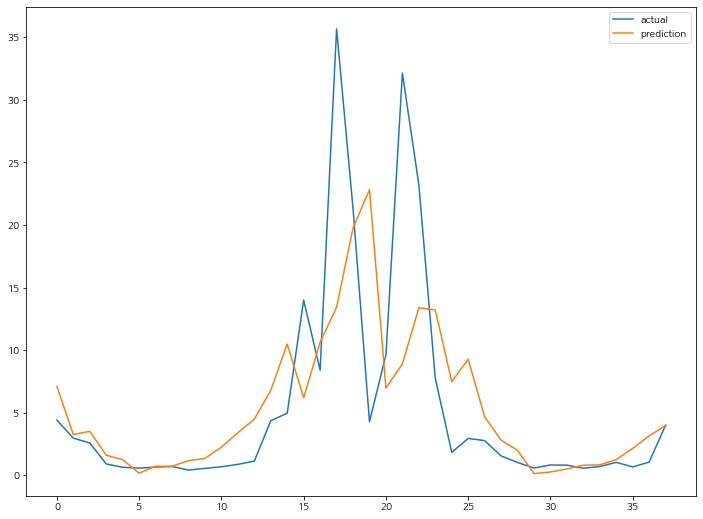

In [22]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()